In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot

In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import files
files.upload()

Saving 상명대_전력수요예측_지수평활 sheet1.xlsx to 상명대_전력수요예측_지수평활 sheet1.xlsx


{'상명대_전력수요예측_지수평활 sheet1.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x9e,lok\x01\x00\x00\x10\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/PowerModel/LSTM_MODEL")

In [ ]:
# 데이터 입력 
import openpyxl
filename = "./상명대_전력수요예측_지수평활 sheet1.xlsx" 
book = openpyxl.load_workbook(filename) #엑셀파일 book 변수에 저장
sheet=book.worksheets[0] #첫번쨰 워크시트 저장

In [ ]:
 data = []
 for row in sheet.rows: #전체 행에대하여 반복 실행
   data.append([
              row[0].value, #1열 데이터
              row[1].value, #2열 데이터
              row[2].value, #3열 데이터
              row[3].value, #4열 데이터
              row[4].value, #5열 데이터
              row[5].value  #6열 데이터
              ])

In [ ]:
import math
import pandas as pd
import numpy as np
data=pd.DataFrame(data[3:])
data.columns=["Name","No","Date","Time","P.D","Temp"]
data

,Name,No,Date,Time,P.D,Temp
0,신정,8,2018-01-01,1,6151.290,-3.2
1,신정,8,2018-01-01,2,6035.190,-3.3
2,신정,8,2018-01-01,3,6000.090,-3.7
3,신정,8,2018-01-01,4,5970.930,-4.0
4,신정,8,2018-01-01,5,6025.200,-4.2
...,...,...,...,...,...,...
8755,0,1,2018-12-31,20,7457.955,-3.7
8756,0,1,2018-12-31,21,7005.975,-4.6
8757,0,1,2018-12-31,22,6709.110,-5.4
8758,0,1,2018-12-31,23,6332.730,-5.2


# **전력만**

In [ ]:
data

,Name,No,Date,Time,P.D,Temp
0,신정,8,2018-01-01,1,6151.290,-3.2
1,신정,8,2018-01-01,2,6035.190,-3.3
2,신정,8,2018-01-01,3,6000.090,-3.7
3,신정,8,2018-01-01,4,5970.930,-4.0
4,신정,8,2018-01-01,5,6025.200,-4.2
...,...,...,...,...,...,...
8755,0,1,2018-12-31,20,7457.955,-3.7
8756,0,1,2018-12-31,21,7005.975,-4.6
8757,0,1,2018-12-31,22,6709.110,-5.4
8758,0,1,2018-12-31,23,6332.730,-5.2


In [ ]:
#전체 데이터
heat_data=data["P.D"]
heat_data=pd.DataFrame(heat_data)
heat_data = np.array(heat_data)

In [ ]:
# heat_data=find_day('화요일')
#전체 날짜 수(1시간단위=>하루는 24시간)
number_of_whole_day = int(heat_data.shape[0]/24)
print(f"Number of Whole day: {number_of_whole_day}")

# #하루를 예측하는 것이므로 하루를 제외한 나머지는 train+valid으로 지정
# number_of_trainval_day=number_of_whole_day-1
# print(f"Number of train and validation day: {number_of_trainval_day}")

#train+val에서 80%를 훈련셋으로 지정  
number_of_train_day = int(number_of_whole_day * 0.8) 
print(f"Number of train day: {number_of_train_day}")

Number of Whole day: 365
Number of train day: 292


In [ ]:
#train_data. 하루에 24개의 data
train_data=heat_data[:number_of_train_day*24]
print(f"Number of train data: {train_data.shape}")

# valid_data=heat_data[number_of_train_day*24:-24]
# print(f"Number of validation data: {valid_data.shape}")

#예측data.마지막 24개의 data(하루전력량)
test_data = heat_data[number_of_train_day*24:]
print(f"Number of test data: {test_data.shape}")

Number of train data: (7008, 1)
Number of test data: (1752, 1)


In [ ]:
#데이터 전처리 
#이유1.LSTM내부적으로 선형 결합의 결과값을 활성화 함수를 거치는데, 
#이때 입력값을 0과 1사이로 만든다. 입력값을 0과 1사이로 만들지 않는다면 
#그레디언트 소실이 발생할 가능성이 커짐.

#이유2.입력 특성이 두가지 이상인 경우, 두 특성의 범위가 많이 다르면 모델성능 떨어짐.

minmax_scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#데이터 스케일링(0,1 사이값으로 변환)
min_max_normalized_train_data=minmax_scaler.fit_transform(train_data)

#fit은 사용하면 안됨.train data에서 fit했던 기준들을 이용해야하기 때문
# min_max_normalized_valid_data = minmax_scaler.transform(valid_data)
min_max_normalized_test_data = minmax_scaler.transform(test_data)

#스케일링된 결과
print(min(train_data), max(train_data))
print(min(min_max_normalized_train_data), max(min_max_normalized_train_data))

[1500.] [14598.105]
[0.] [1.]


In [ ]:
#numpy를 pandas로 변환
min_max_normalized_train_data = pd.DataFrame(min_max_normalized_train_data)[0]
# min_max_normalized_valid_data = pd.DataFrame(min_max_normalized_valid_data)[0]
min_max_normalized_test_data = pd.DataFrame(min_max_normalized_test_data)[0]

In [ ]:
#학습데이터, 결과데이터 배열로 return  
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    start = sequence.index.start
    for i in range(start, len(sequence)+start):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > start + len(sequence)-1:
            break
        # gather input and output parts of the pattern
        if start > 90:
            a = i - start
            b = end_ix - start
        else:
            a = i
            b = end_ix
        # seq_x, seq_y = sequence[a:b], sequence[end_ix]
        seq_x, seq_y = sequence[a:b], sequence[b]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
#데이터 split을 위한 값. 2개의 input, 1개의 result   
## Ex) [1, 2, 3, 4, 5], n_steps = 2 -> [[1, 2, [3]], [2, 3, [4]], [3, 4, [5]]]

n_step = 2

x_train, y_train = split_sequence(min_max_normalized_train_data, n_step)
# x_valid, y_valid = split_sequence(min_max_normalized_valid_data, n_step)
x_test, y_test = split_sequence(min_max_normalized_test_data, n_step)

print(x_train.shape)
print(y_train.shape)

(7006, 2)
(7006,)


In [ ]:
#RNN- 데이터 형변환 [samples, timesteps, features]
n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
# x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

print(x_train.shape)  
print(y_train.shape) 

(7006, 2, 1)
(7006,)


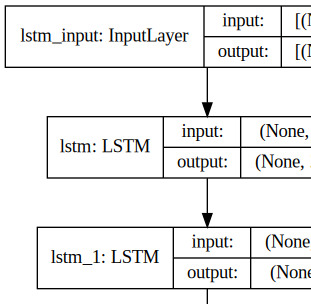

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(2, 1)))  #input_shape=(2,1)
model.add(LSTM(128, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

%matplotlib inline
from keras.utils import plot_model
plot_model(model,to_file="model.png",show_shapes=True)

SVG(model_to_dot(model,show_shapes=True).create(prog="dot",format="svg"))

In [ ]:
#모델 정의
#모델 성능(오류율이 5%미만이면 break, 아니면 10번 시도 후에 break)
i = 0
while True and i < 1:
    model = Sequential()
    model.add(LSTM(64, 
                   activation='relu', 
                   return_sequences=True, 
                   input_shape=(n_step, n_features)))  #input_shape=(2,1)
    model.add(LSTM(128, 
                   activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', 
                  loss='mse')
    
    #model training start
    model.fit(x_train, y_train,epochs=350, batch_size=100, verbose=1)

    #학습모델로 test data 예측  
    yhat = model.predict(x_test, verbose=0)
    yhat = minmax_scaler.inverse_transform(yhat)  #원래값으로 변경
    
    #test_data[n_step:]=test데이터[0],[1]의 y_train값
    result = np.mean(abs(test_data[n_step:] - yhat)/test_data[n_step:]) 
    if result*100 < 5:
        print(result)
        model.save("./save_model")
        break
    else:
        del model
        i+=1

In [ ]:
result = np.mean(abs(test_data[n_step:] - yhat)/test_data[n_step:])*100  #test_data[n_step:]=test데이터[0],[1]의 y_train값
print(result)

4.0897327625713675


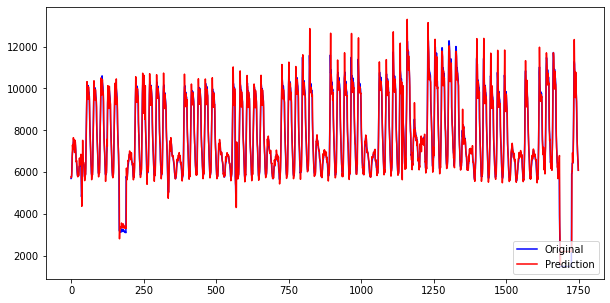

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(test_data[n_step:], 'b', label='Original')
ax1.plot(yhat, 'r', label='Prediction')
ax1.legend(loc="lower right")

## **전력+온도**

In [ ]:
data

,Name,No,Date,Time,P.D,Temp
0,신정,8,2018-01-01,1,6151.290,-3.2
1,신정,8,2018-01-01,2,6035.190,-3.3
2,신정,8,2018-01-01,3,6000.090,-3.7
3,신정,8,2018-01-01,4,5970.930,-4.0
4,신정,8,2018-01-01,5,6025.200,-4.2
...,...,...,...,...,...,...
8755,0,1,2018-12-31,20,7457.955,-3.7
8756,0,1,2018-12-31,21,7005.975,-4.6
8757,0,1,2018-12-31,22,6709.110,-5.4
8758,0,1,2018-12-31,23,6332.730,-5.2


In [ ]:
columns = ['P.D', 'Temp']
day_data2 = data[columns]
heat_data2=pd.DataFrame(day_data2)
heat_data2['P.D']=pd.to_numeric(heat_data2['P.D'])
heat_data2['Temp']=pd.to_numeric(heat_data2['Temp'])
heat_data2 = np.array(heat_data2)

In [ ]:
#전체 날짜 수(1시간단위=>하루는 24시간)
number_of_whole_day = int(heat_data2.shape[0]/24)
print(f"Number of Whole day: {number_of_whole_day}")

# #하루를 예측하는 것이므로 하루를 제외한 나머지는 train+valid으로 지정
# number_of_trainval_day=number_of_whole_day-1
# print(f"Number of train and validation day: {number_of_trainval_day}")

#train+val에서 80%를 훈련셋으로 지정  
number_of_train_day = int(number_of_whole_day * 0.8) 
print(f"Number of train day: {number_of_train_day}")

Number of Whole day: 365
Number of train day: 292


In [ ]:
#train_data. 하루에 24개의 data
train_data2=heat_data2[:number_of_train_day*24]
print(f"Number of train data: {train_data2.shape}")

# valid_data=heat_data[number_of_train_day*24:-24]
# print(f"Number of validation data: {valid_data.shape}")

#예측data.마지막 24개의 data(하루전력량)
test_data2 = heat_data2[number_of_train_day*24:]
print(f"Number of test data: {test_data2.shape}")

Number of train data: (7008, 2)
Number of test data: (1752, 2)


In [ ]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#데이터 스케일링(0,1 사이값으로 변환)
min_max_normalized_train_data2=minmax_scaler.fit_transform(train_data2)

#fit은 사용하면 안됨.train data에서 fit했던 기준들을 이용해야하기 때문
# min_max_normalized_valid_data2= minmax_scaler.transform(valid_data2)
min_max_normalized_test_data2= minmax_scaler.transform(test_data2)

In [ ]:
#numpy를 pandas로 변환
min_max_normalized_train_data2 = pd.DataFrame(min_max_normalized_train_data2)
# min_max_normalized_valid_data2 = pd.DataFrame(min_max_normalized_valid_data2)
min_max_normalized_test_data2 = pd.DataFrame(min_max_normalized_test_data2)

In [ ]:
#학습데이터, 정답데이터 배열로 return  
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    start = sequence.index.start
    for i in range(start, len(sequence)+start):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > start + len(sequence)-1:
            break
        # gather input and output parts of the pattern
        if start > 90:
            a = i - start
            b = end_ix - start
        else:
            a = i
            b = end_ix
        # 전력+온도 데이터(다중요인)이므로 values값을 넣어야함.
        seq_x, seq_y = sequence[a:b].values, sequence[0][b]  
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_step = 2

x_train2, y_train2 = split_sequence(min_max_normalized_train_data2, n_step)
# x_valid2, y_valid2 = split_sequence(min_max_normalized_valid_data2, n_step)
x_test2, y_test2 = split_sequence(min_max_normalized_test_data2, n_step)

print(x_train2.shape)
print(y_train2.shape)

(7006, 2, 2)
(7006,)


In [ ]:
#RNN- 데이터 형변환 [samples, timesteps, features]
n_features = 2
x_train2 = x_train2.reshape((x_train2.shape[0], x_train2.shape[1], n_features))
# x_valid2 = x_valid2.reshape((x_valid2.shape[0], x_valid2.shape[1], n_features))
x_test2 = x_test2.reshape((x_test2.shape[0], x_test2.shape[1], n_features))

print(x_train2.shape)  
print(y_train2.shape)  #정답
print(x_test2.shape) 

(7006, 2, 2)
(7006,)
(1750, 2, 2)


In [ ]:
#예측값과 비교할 x_test의 전력 
test_data2_new=min_max_normalized_test_data2[0][2:]
test_data2_new=pd.DataFrame(test_data2_new)
new=[]

for i in range(2,len(min_max_normalized_test_data2)):
    new_=[]
    new_.append(test_data2_new[0][i])
    new.append(new_)
new[:5]

[[0.3207486884553148],
 [0.32165568988796467],
 [0.33236449089391185],
 [0.3687785370479165],
 [0.40157488430578314]]

In [ ]:
#모델 정의
#모델 성능(오류율이 5%미만이면 break, 아니면 10번 시도 후에 break)
i = 0
while True and i < 10:
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_step, n_features)))  #input_shape=(2,1)
    model.add(LSTM(128, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    #model training start
    model.fit(x_train2, y_train2,epochs=350, batch_size=100, verbose=1)

    #학습모델로 test data 예측  
    yhat = model.predict(x_test2, verbose=0)
    # yhat = minmax_scaler.inverse_transform(yhat)  #원래값으로 변경

    #Mean absolute percentage error - https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
    result = np.mean(abs(new - yhat)/new) 
    if result*100 < 5:
        break
    else:
        del model
        i+=1

Epoch 1/350
71/71 [==============================] - 6s 14ms/step - loss: 0.1713
Epoch 2/350
71/71 [==============================] - 1s 14ms/step - loss: 0.0087
Epoch 3/350
71/71 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 4/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0041
Epoch 5/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 6/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 7/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0035
Epoch 8/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 9/350
71/71 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 10/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0019
Epoch 11/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 12/350
71/71 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 13/350
71/71 [=====

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 301/350
71/71 [==============================] - 1s 15ms/step - loss: 8.5927e-04
Epoch 302/350
71/71 [==============================] - 1s 15ms/step - loss: 8.8411e-04
Epoch 303/350
71/71 [==============================] - 1s 16ms/step - loss: 8.4747e-04
Epoch 304/350
71/71 [==============================] - 1s 15ms/step - loss: 9.0538e-04
Epoch 305/350
71/71 [==============================] - 1s 15ms/step - loss: 8.0471e-04
Epoch 306/350
71/71 [==============================] - 1s 15ms/step - loss: 8.4251e-04
Epoch 307/350
71/71 [==============================] - 1s 15ms/step - loss: 9.4111e-04
Epoch 308/350
71/71 [==============================] - 1s 16ms/step - loss: 8.1981e-04
Epoch 309/350
71/71 [==============================] - 1s 16ms/step - loss: 8.6675e-04
Epoch 310/350
71/71 [==============================] - 1s 15ms/step - loss: 8.7438e-04
Epoch 311/350
71/71 [==============================] - 1s 16ms/step - loss: 8.7617e-04
Epoch 3

In [ ]:
for i in range(0,len(x_test2)):
  a=abs(new[i] - yhat[i])/new[i]
  np.nan_to_num(a,copy=False)  #inf를 숫자형으로 
result=np.mean(a)*100
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


2.3740943205514142

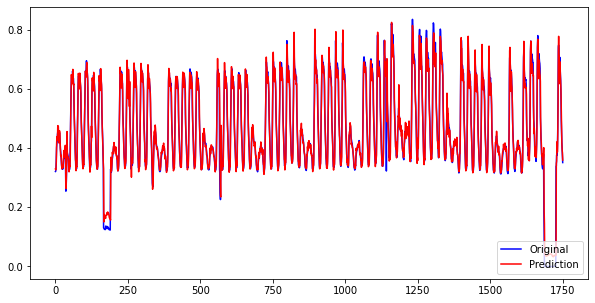

In [ ]:
  import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(new, 'b', label='Original')
ax1.plot(yhat, 'r', label='Prediction')
ax1.legend(loc="lower right")